## [웹크롤링_나무위키 사이트 분석 및 시각화]
### <step1.크롤링>:크롤링으로 웹데이터 가져오기

[웹크롤링 라이브러리 사용하기]
- 파이썬에서는 BeautifulSoup과 requests 라이브러리로 웹 크롤러를 만들 수 있음
- requests는 특정 URL로부터 HTML 문서를 가져오는 작업을 수행
- 나무위키와 같은 페이지는 HTML 문서가 Javascript로 동적 로딩되는 경우가 있음
- requests대신 selenium 라이브러리를 이용해 크롬 브라우저로 동적 웹 크롤링 수행
- selenium은 웹 브라우저를 자동으로 구성해주는 라이브러리
- selenium을 사용하기 위해 크롬 드라이버를 이용해 크롬 브라우저 자동으로 구동 => 크롬 드라이버 필요

### [BeautifulSoup과 selenium을 이용한 웹 크롤링]
- (env_name)`pip install selenium`

### [크롬 브라우저 업데이트 및 크롬 드라이버 설치]
- 크롬 브라우저 설정에서 최신 버전으로 업데이트
- 크롬 드라이버 사이트에서 브라우저 버전에 맞는 드라이버 다운로드
    - https://chromedriver.chromium.org/downloads
- chromedriver.exe 파일을 노트북 파일 경로에 저장

In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [40]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup as bts
import re #정규식 표현을 위한 모듈
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [24]:
#윈도우용 크롬 웹 드라이버 실행 경로(window)지정
executable_path="chromedriver.exe"
driver=webdriver.Chrome(executable_path=executable_path)

#사이트의 html구조에 기반하여 크롤링을 수행
source_url="https://namu.wiki/RecentChanges"
driver.get(source_url)

element=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,"app")))
req=driver.page_source
req

'<html><head><link href="/skins/senkawa/6.0ec579cd0a387a25b691.css" rel="stylesheet"><link href="/skins/senkawa/3.c2f4326b616fb16062e8.css" rel="stylesheet"><script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script><style type="text/css">.resize-observer[data-v-b329ee4c]{position:absolute;top:0;left:0;z-index:-1;width:100%;height:100%;border:none;background-color:transparent;pointer-events:none;display:block;overflow:hidden;opacity:0}.resize-observer[data-v-b329ee4c] object{display:block;position:absolute;top:0;left:0;height:100%;width:100%;overflow:hidden;pointer-events:none;z-index:-1}</style><link rel="stylesheet" type="text/css" href="/skins/senkawa/10.4d02833f9fb9e7f9340e.css"><script charset="utf-8" src="/skins/senkawa/10.4d02833f9fb9e7f9340e.js"></script><title>최근 변경내역 - 나무위키</title><link data-n-head="1" rel="canonical" href="https://namu.wiki/RecentChanges"><link data-n-head="1" rel="search" type="application/opensearchdescription+xml" title="나무위키" href="/opensearch.xml">

In [25]:
soup=bts(req,'html.parser')
soup

<html><head><link href="/skins/senkawa/6.0ec579cd0a387a25b691.css" rel="stylesheet"/><link href="/skins/senkawa/3.c2f4326b616fb16062e8.css" rel="stylesheet"/><script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script><style type="text/css">.resize-observer[data-v-b329ee4c]{position:absolute;top:0;left:0;z-index:-1;width:100%;height:100%;border:none;background-color:transparent;pointer-events:none;display:block;overflow:hidden;opacity:0}.resize-observer[data-v-b329ee4c] object{display:block;position:absolute;top:0;left:0;height:100%;width:100%;overflow:hidden;pointer-events:none;z-index:-1}</style><link href="/skins/senkawa/10.4d02833f9fb9e7f9340e.css" rel="stylesheet" type="text/css"/><script charset="utf-8" src="/skins/senkawa/10.4d02833f9fb9e7f9340e.js"></script><title>최근 변경내역 - 나무위키</title><link data-n-head="1" href="https://namu.wiki/RecentChanges" rel="canonical"/><link data-n-head="1" href="/opensearch.xml" rel="search" title="나무위키" type="application/opensearchdescription+xm

In [26]:
contents_table = soup.find(name="table") #find 함수를 이용해 태그명이 table인 것을 찾기
table_body = contents_table.find(name= "tbody") #table 안 tbody 태그인 것 찾기
table_rows = table_body.find_all(name="tr") #table tbody 안 tr태그인 것 찾기 => [ ]의 요소로 담김 
#table_body
table_rows[0]

<tr class="" data-v-349171da=""><td data-v-349171da=""><a data-v-349171da="" href="/w/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90">백현중학교</a> <a data-v-349171da="" href="/history/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90">[역사]</a> <a data-v-349171da="" href="/diff/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90?rev=315&amp;oldrev=314">[비교]</a> <a data-v-349171da="" href="/discuss/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90">[토론]</a> <span data-v-349171da="">(<span class="" data-v-349171da="" data-v-6cbb5b59="">0</span>)</span></td> <td data-v-349171da=""><div class="v-popover" data-v-349171da="" data-v-9a113440=""><div aria-describedby="popover_qoeocvfqwj" class="trigger" style="display: inline-block;"><a class="IM9WYpTN" data-v-9a113440="">kimapple</a> </div> </div> <!-- --></td> <td data-v-349171da=""><time data-v-349171da="" datetime="2022-01-18T05:16:46.000Z">2022-01-18 14:16:46</time></td></tr>

#### attrs와 get의 차이
- attrs[''] : 원하는 정보를 딕셔너리 형태로 가져와서 key와 value로 값을 가져옴.
- get('') : 원하는 정보의 속성값을 가져옴

In [36]:
#특성 속성 값을 추출
page_url_base = "https://namu.wiki" #베이스 url 정의
page_urls = [] # href 속성값을 담기 위한 빈 리스트  

for i in range(0, len(table_rows)): #table_rows의 길이만큼 반복
    first_td = table_rows[i].find_all('td')[0] #td가 3개 있는데 0번째에 원하는 href 가 있음 
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href') #나무위키주소+get() 태그가 가지고 있는 속성 추출 td_url[0][href] 도 가능
        #print(page_url)
        if "png" not in page_url:
            page_urls.append(page_url)


            
for page in page_urls:
    print(page)
#     page_urls = list(set(page_urls)) #중복 url 제거

# print(len(page_urls))
# for page in page_urls:
#     print(page)

https://namu.wiki/w/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90
https://namu.wiki/w/%ED%99%94%EC%84%B1%20%EB%B2%84%EC%8A%A4%2073
https://namu.wiki/w/%EB%82%98%20%ED%98%BC%EC%9E%90%EB%A7%8C%20%EB%A0%88%EB%B2%A8%EC%97%85
https://namu.wiki/w/%EC%A7%84(%EB%B0%A9%ED%83%84%EC%86%8C%EB%85%84%EB%8B%A8)
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:COMPLETE%20WITH%20YOU%20KIM%20DONG%20HYUN%202.jpg
https://namu.wiki/w/%EC%9D%B4%EC%88%98%EC%A0%95(%EA%B5%90%EC%88%98)
https://namu.wiki/w/%EC%B5%9C%EA%B0%95%EC%B0%BD%EB%AF%BC
https://namu.wiki/w/%ED%96%89%EB%B3%B5%20(Happiness)
https://namu.wiki/w/WWE%20%ED%8F%90%EA%B8%B0%20%EA%B0%81%EB%B3%B8
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:COMPLETE%20WITH%20YOU%20KIM%20DONG%20HYUN%201.jpg
https://namu.wiki/w/%EA%B0%95%EB%B6%81%EA%B5%AC
https://namu.wiki/w/%EC%A7%84%EA%B2%A9%EC%9D%98%20%EA%B1%B0%EC%9D%B8%20The%20Final%20Season
https://namu.wiki/w/%EA%B0%95%EB%B6%81%EA%B5%AC
https://namu.wiki/w/%EC%8B%A0%EC%9E%AC%ED%8F%89
https://namu.wiki/w/%EC%A0%84%EA%B5%B0%20%EA

### 드라이버를 for문을 돌려 필요한 자료 추출

In [42]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비
columns = ["title", "category", "content_text"]
df = pd.DataFrame(columns=columns)

#for page_url in page_urls:
for i in range(10):
    # 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
    excutable_path = "chromedriver.exe"
    driver = webdriver.Chrome(executable_path=excutable_path)
    # 크롬 드라이버를 통해 page_urls[0]번째 사이트의 HTML 문서 가져옴
    #driver.get(page_url)  # page_urls[i],  page_url의 정보를 가져옴
    driver.get(page_urls[i])  # page_urls[i],  page_url의 정보를 가져옴
    req = driver.page_source # 페이지 소스를 req에 저장
    soup = bts(req, 'html.parser') # html.parser로 파싱
    contents_table = soup.find(name="article") #  불러온 소스에서 태그명이 article인 요소 하나만 추출

    ### 타이틀 추출
    title = contents_table.find_all('h1')[0] # 태그명이 h1인 모든 태그 추출, article h1
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
        
    ### 카테고리 추출
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all("ul")) > 0: # article ul 로 검색한 결과 여러 ul 결과가 나올 경우
        category = contents_table.find_all("ul")[0] # 제일 첫번째 article ul 을 category로 설정
    else:
        category = None
        
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""

    ### 내용 추출
    #contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})  
    #div  태그 중  class 속성값이  wiki-paragraph인 요소를 추출
    content_paragraphs = contents_table.select("div.wiki-paragraph")  
    #  내용으로 추출한 리스트를 하나의 문자열로 전처리
    content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성
    
    # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")

    # 모든 정보를 하나의 데이터 프레임에 저장하기 위해서 시리즈 생성
    # 각 페이지의 정보를 추출하여 제목, 카테고리, 내용 순으로 행을 생성
    row = [row_title, row_category, "".join(content_corpus_list)]
    # 시리즈로 만듦
    series = pd.Series(row, index=df.columns)
    # 데이터 프레임에 시리즈를 추가, 한 페이지 당 하나의 행 추가
    df = df.append(series, ignore_index=True)
    
    # 크롤링에 사용한 브라우저를 종료합니다.
    driver.close()

In [43]:
df

,title,category,content_text
0,백현중학교,성남시의 중학교1995년 개교나무위키 교육기관 프로젝트,은(는) 여기로 연결됩니다. 용인시 소재인 동명의 중학교에 대한 내용은 용인백...
1,화성 버스 73,화성시의 시내버스2008년 개업한 버스 노선2015년 개업한 버스 노선2022년 폐...,화성시 시내버스+ [ 펼치기 · 접기 ]광역급행M4130M4137M4434M444...
2,나 혼자만 레벨업,나 혼자만 레벨업웹소설/목록,"나 혼자만 레벨업Only I level up장르현대 판타지, 헌터, 어반 판타지작가..."
3,진(방탄소년단),방탄소년단한국 남가수1992년 출생송파구 출신 인물안양시 출신 인물2013년 데뷔광...,은(는) 여기로 연결됩니다. 동음이의어에 대한 내용은 진 문서를의 번 문단을의...
4,파일:COMPLETE WITH YOU KIM DONG HYUN 2.jpg,파일/AB6IX,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은...
5,이수정(교수),1964년 출생서초구 출신 인물연세대학교 출신리라초등학교 출신대한민국의 사회과학 교...,로그인 후 편집 가능한 문서입니다.이 문서는이 문단은 토론을 통해 소속 정당이...
6,최강창민,최강창민,유노윤호최강창민 [ 전 멤버 ]영웅재중믹키유천시아준수 [ 한국 음반 ]앨범TRI-A...
7,행복 (Happiness),Red Velvet/음반2014년 싱글,은(는) 여기로 연결됩니다. H.O.T.의 동명의 곡에 대한 내용은 행복(H....
8,WWE 폐기 각본,WWE,1. 개요2. 목록다음은 WWE에서 계획했으나 시행되지 못한채 폐기된 각본들이다.1...
9,파일:COMPLETE WITH YOU KIM DONG HYUN 1.jpg,파일/AB6IX,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은...


In [44]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [45]:
import konlpy

In [46]:
!pip install pytagcloud pygame simplejson

  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-py3-none-any.whl size=759870 sha256=624f7645531bd658dedc095f1b10f0c43b3dda3ade04fd478199434e50928dce
  Stored in directory: c:\users\yj\appdata\local\pip\cache\wheels\74\9f\93\6322d7ac8b7c348b7d625f95919691d20cd46d2989dc61b165
Successfully built pytagcloud


In [47]:
import pytagcloud

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### [각 링크 페이지내 텍스트 구조 확인 => 제목, 카테고리, 내용 출력]

In [28]:
driver=webdriver.Chrome(executable_path=executable_path)
#크롬 드라이버를 통해 page_urls[0]번째 사이트의 html 문서 가져옴
driver.get(page_urls[0])#page_urls[0]의 정보를 가져옴
req=driver.page_source#페이지 소스를 req에 저장
req##소스가 문제없이 불러지는지 확인.

'<html><head><title>백현중학교 - 나무위키</title><meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" name="viewport" content="user-scalable=no, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0, width=device-width"><meta data-n-head="ssr" http-equv="x-ua-compatible" content="ie=edge"><meta data-n-head="ssr" name="generator" content="the seed"><meta data-n-head="ssr" name="mobile-web-app-capable" content="yes"><meta data-n-head="ssr" name="application-name" content="나무위키"><meta data-n-head="ssr" name="msapplication-tooltip" content="나무위키"><meta data-n-head="ssr" name="msapplication-starturl" content="/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8"><meta data-n-head="ssr" name="robots" content="max-image-preview:large"><meta data-n-head="ssr" name="theme-color" content="#008275"><meta data-n-head="ssr" name="googlebot" content="noarchive"><link data-n-head="ssr" rel="canonical" href="https://namu.wiki/w/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90"><link data-n-head

In [29]:
soup=bts(req,'html.parser')
soup

<html><head><title>백현중학교 - 나무위키</title><meta charset="utf-8" data-n-head="ssr"/><meta content="user-scalable=no, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0, width=device-width" data-n-head="ssr" name="viewport"/><meta content="ie=edge" data-n-head="ssr" http-equv="x-ua-compatible"/><meta content="the seed" data-n-head="ssr" name="generator"/><meta content="yes" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="나무위키" data-n-head="ssr" name="application-name"/><meta content="나무위키" data-n-head="ssr" name="msapplication-tooltip"/><meta content="/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8" data-n-head="ssr" name="msapplication-starturl"/><meta content="max-image-preview:large" data-n-head="ssr" name="robots"/><meta content="#008275" data-n-head="ssr" name="theme-color"/><meta content="noarchive" data-n-head="ssr" name="googlebot"/><link data-n-head="ssr" href="https://namu.wiki/w/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90" rel="canonical"/><link 

In [30]:
contents_article=soup.find(name='article')
contents_article

<article data-v-47329d14="" data-v-e9de27d8=""><!-- --> <!-- --> <div class="8z71awy+" data-v-dc897e4a="" data-v-e9de27d8=""><div class="eFDRAnEj" data-v-dc897e4a=""><a class="has-tooltip" data-original-title="null" data-v-dc897e4a="" href="/member/star/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90"><span class="ion-ios-star-outline 7/cj/n5I" data-v-dc897e4a=""></span> 4</a> <!-- --> <a data-v-dc897e4a="" href="/backlink/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90">역링크</a> <a class="" data-v-dc897e4a="" href="/discuss/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90">토론</a> <a data-v-dc897e4a="" href="/edit/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90" rel="nofollow">편집</a> <a data-v-dc897e4a="" href="/history/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90">역사</a> <!-- --> <a data-v-dc897e4a="" href="/acl/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90" rel="nofollow">ACL</a> </div></div> <h1 data-v-e9de27d8=""><a data-v-e9de27d8="" href="/w/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90">

In [31]:
##타이틀 추출
title=contents_article.find_all('h1')[0]#태그명이 h1인 모든 태그 추출, => select('article h1')
title

<h1 data-v-e9de27d8=""><a data-v-e9de27d8="" href="/w/%EB%B0%B1%ED%98%84%EC%A4%91%ED%95%99%EA%B5%90"><!-- -->백현중학교</a> <!-- --></h1>

In [32]:
category=contents_article.find_all('ul')[0]
category

<ul data-v-9c687c72=""><li data-v-9c687c72=""><a class="" data-v-9c687c72="" href="/w/%EB%B6%84%EB%A5%98:%EC%84%B1%EB%82%A8%EC%8B%9C%EC%9D%98%20%EC%A4%91%ED%95%99%EA%B5%90">성남시의 중학교</a></li><li data-v-9c687c72=""><a class="" data-v-9c687c72="" href="/w/%EB%B6%84%EB%A5%98:1995%EB%85%84%20%EA%B0%9C%EA%B5%90">1995년 개교</a></li><li data-v-9c687c72=""><a class="" data-v-9c687c72="" href="/w/%EB%B6%84%EB%A5%98:%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4%20%EA%B5%90%EC%9C%A1%EA%B8%B0%EA%B4%80%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8">나무위키 교육기관 프로젝트</a></li></ul>

In [33]:
#내용추출
paragraphs=contents_article.select('div.wiki-paragraph')#class가 wiki-paragraph인 div를 추출
#내용으로 추출한 리스트를 하나의 문자열로 전처리
contents_corpus_list=[]

for paragraph in paragraphs:
    contents_corpus_list.append(paragraph.text)
    
contents_corpus=" ".join(contents_corpus_list) #"텍스트".join(리스트명)=>리스트의 요소를 '텍스트'로 구분하여 하나의 문자열로 만듦
contents_corpus

' \xa0 은(는) 여기로 연결됩니다. 용인시 소재인 동명의 중학교에 대한 내용은 용인백현중학교 문서를의 번 문단을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 참고하십시오.  \xa0 가입 후 15일이 지나야 편집 가능한 문서입니다. 이 문서는 학교 관련 문서이며, 로그인 후 수정 가능합니다. 다음과 같은 서술은 작성 시 제재될 수 있습니다. [ 펼치기 · 접기 ]현황과 역사를 불문하고 학교 간 우열이나 서열을 확정·조장하는 서술과 학교 수준을 비하하는 서술학교 내 특정 임의 단체(급식, 매점 등)와 교내 학생 단체(동아리, 학생회 등)에 관한 서술언론에 보도되지 않은 학교 관련 사건 사고에 관한 서술학교 밖에서 알려지지 않은 교사나 학생에 관한 서술템플릿:학교에 존재하지 않는 문단에 관한 서술편집지침에 어긋나는 서술 현황과 역사를 불문하고 학교 간 우열이나 서열을 확정·조장하는 서술과 학교 수준을 비하하는 서술 학교 내 특정 임의 단체(급식, 매점 등)와 교내 학생 단체(동아리, 학생회 등)에 관한 서술 언론에 보도되지 않은 학교 관련 사건 사고에 관한 서술 학교 밖에서 알려지지 않은 교사나 학생에 관한 서술 템플릿:학교에 존재하지 않는 문단에 관한 서술 편집지침에 어긋나는 서술  경기도 성남시 분당구의 중학교  [ 펼치기 · 접기 ]구미중

In [34]:
print(title.text.strip())
print('\n')
print(category.text)
print('\n')
print(contents_corpus)
#크롤링에 사용한 브라우저를 종료합니다.
driver.close()

백현중학교


성남시의 중학교1995년 개교나무위키 교육기관 프로젝트


   은(는) 여기로 연결됩니다. 용인시 소재인 동명의 중학교에 대한 내용은 용인백현중학교 문서를의 번 문단을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을, 에 대한 내용은  문서를의 번 문단을의 번 문단을의  부분을의  부분을 참고하십시오.    가입 후 15일이 지나야 편집 가능한 문서입니다. 이 문서는 학교 관련 문서이며, 로그인 후 수정 가능합니다. 다음과 같은 서술은 작성 시 제재될 수 있습니다. [ 펼치기 · 접기 ]현황과 역사를 불문하고 학교 간 우열이나 서열을 확정·조장하는 서술과 학교 수준을 비하하는 서술학교 내 특정 임의 단체(급식, 매점 등)와 교내 학생 단체(동아리, 학생회 등)에 관한 서술언론에 보도되지 않은 학교 관련 사건 사고에 관한 서술학교 밖에서 알려지지 않은 교사나 학생에 관한 서술템플릿:학교에 존재하지 않는 문단에 관한 서술편집지침에 어긋나는 서술 현황과 역사를 불문하고 학교 간 우열이나 서열을 확정·조장하는 서술과 학교 수준을 비하하는 서술 학교 내 특정 임의 단체(급식, 매점 등)와 교내 학생 단체(동아리, 학생회 등)에 관한 서술 언론에 보도되지 않은 학교 관련 사건 사고에 관한 서술 학교 밖에서 알려지지 않은 교사나 학생에 관한 서술 템플릿:학교에 존재하지 않는 문단에 관한 서술 편집지침에 어긋나는 서술 

### 네이버 크롤링

'<html lang="ko"><head>\n<meta name="referrer" contents="always">\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="description" content="Q&amp;A의 질문 목록을 볼 수 있습니다.">\n<meta name="viewport" content="width=1024">\n\n<meta name="msapplication-config" content="none">\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.kin/static/pc/20211222160644/css/min/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.kin/static/pc/20211222160644/css/min/components.css">\n\n\n\t\n\t\n\t\t<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.kin/static/pc/20211222160644/css/min/other.css">\n\t\n\n\n\n\t\t\n\t\t<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.kin/static/pc/20211222160644/css/min/people.css">\n\t\n\n\n\n<style type="text/css">\n.board_box {width:629px; padding:0 25px 44px 25px; backgr
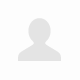
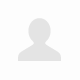

In [14]:
#윈도우용 크롬 웹 드라이버 실행 경로(window)지정
executable_path="chromedriver.exe"
driver=webdriver.Chrome(executable_path=executable_path)

#사이트의 html구조에 기반하여 크롤링을 수행
source_url="https://kin.naver.com/qna/kinupList.naver"
driver.get(source_url)

#element=WebDriverWait(driver,5).until(EC.presence_of_element_located((By.CLASS_NAME,"app")))
req=driver.page_source
req

<html lang="ko"><head>
<meta contents="always" name="referrer"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="Q&amp;A의 질문 목록을 볼 수 있습니다." name="description"/>
<meta content="width=1024" name="viewport"/>
<meta content="none" name="msapplication-config"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20211222160644/css/min/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20211222160644/css/min/components.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20211222160644/css/min/other.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20211222160644/css/min/people.css" rel="stylesheet" type="text/css"/>
<style type="text/css">
.board_box {width:629px; padding:0 25px 44px 25px; background:url(https://ssl.pstatic.net/static/kin/09renewal/bg_table_top.gif) repeat-x top;}

.boardtype2 tbody td.result_no {font-weig
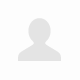
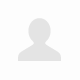

In [15]:
soup=bts(req,'html.parser')
soup

In [16]:
contents_board=soup.select('td.title a')
contents_board

[<a class="_nclicks:kls_bst.list,r:1,i:100412_409937830" href="/qna/detail.naver?d1id=10&amp;dirId=100412&amp;docId=409937830" rel="KIN">유치원 신원 진술서 판매처, 작성 방법</a>,
 <a class="_nclicks:kls_bst.list,r:2,i:40102_409937747" href="/qna/detail.naver?d1id=4&amp;dirId=40102&amp;docId=409937747" rel="KIN">확정기여형DC 퇴직연금 주식 되나요?</a>,
 <a class="_nclicks:kls_bst.list,r:3,i:12091501_409937692" href="/qna/detail.naver?d1id=12&amp;dirId=12091501&amp;docId=409937692" rel="KIN">허리디스크 한의원 치료는 어떨까요? 분당 근처로 알려주...</a>,
 <a class="_nclicks:kls_bst.list,r:4,i:7011401_409937656" href="/qna/detail.naver?d1id=7&amp;dirId=7011401&amp;docId=409937656" rel="KIN">임신 여부</a>,
 <a class="_nclicks:kls_bst.list,r:5,i:20132_409937653" href="/qna/detail.naver?d1id=2&amp;dirId=20132&amp;docId=409937653" rel="KIN">롤 미드 라인</a>,
 <a class="_nclicks:kls_bst.list,r:6,i:5010601_409937600" href="/qna/detail.naver?d1id=5&amp;dirId=5010601&amp;docId=409937600" rel="KIN">저 진짜 급한데 도와주세요 아까 갑자</a>,
 <a class="_nclicks:kls_bst.list,r:7

In [35]:
page_url_base = "https://kin.naver.com" #베이스 url 정의
page_urls = [] # href 속성값을 담기 위한 빈 리스트  

for content in contents_board:
    if "png" not in page_url:
            page_urls.append(page_url)
    page_urls.append(page_url_base+content['href'])

for page in page_urls:
    print(page)

https://namu.wiki/w/%EB%AC%B8%20%EB%82%98%EC%9D%B4%ED%8A%B8(%EB%93%9C%EB%9D%BC%EB%A7%88)
https://kin.naver.com/qna/detail.naver?d1id=10&dirId=100412&docId=409937830
https://namu.wiki/w/%EB%AC%B8%20%EB%82%98%EC%9D%B4%ED%8A%B8(%EB%93%9C%EB%9D%BC%EB%A7%88)
https://kin.naver.com/qna/detail.naver?d1id=8&dirId=8040106&docId=409937753
https://namu.wiki/w/%EB%AC%B8%20%EB%82%98%EC%9D%B4%ED%8A%B8(%EB%93%9C%EB%9D%BC%EB%A7%88)
https://kin.naver.com/qna/detail.naver?d1id=4&dirId=40102&docId=409937747
https://namu.wiki/w/%EB%AC%B8%20%EB%82%98%EC%9D%B4%ED%8A%B8(%EB%93%9C%EB%9D%BC%EB%A7%88)
https://kin.naver.com/qna/detail.naver?d1id=12&dirId=12091501&docId=409937692
https://namu.wiki/w/%EB%AC%B8%20%EB%82%98%EC%9D%B4%ED%8A%B8(%EB%93%9C%EB%9D%BC%EB%A7%88)
https://kin.naver.com/qna/detail.naver?d1id=7&dirId=7011401&docId=409937656
https://namu.wiki/w/%EB%AC%B8%20%EB%82%98%EC%9D%B4%ED%8A%B8(%EB%93%9C%EB%9D%BC%EB%A7%88)
https://kin.naver.com/qna/detail.naver?d1id=2&dirId=20132&docId=409937653
https://namu

In [18]:
driver=webdriver.Chrome(executable_path=executable_path)
#크롬 드라이버를 통해 page_urls[0]번째 사이트의 html 문서 가져옴
driver.get(page_urls[0])#page_urls[0]의 정보를 가져옴
req=driver.page_source#페이지 소스를 req에 저장
req##소스가 문제없이 불러지는지 확인.

'<html><head><title>마법사의 밤 - 나무위키</title><meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" name="viewport" content="user-scalable=no, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0, width=device-width"><meta data-n-head="ssr" http-equv="x-ua-compatible" content="ie=edge"><meta data-n-head="ssr" name="generator" content="the seed"><meta data-n-head="ssr" name="mobile-web-app-capable" content="yes"><meta data-n-head="ssr" name="application-name" content="나무위키"><meta data-n-head="ssr" name="msapplication-tooltip" content="나무위키"><meta data-n-head="ssr" name="msapplication-starturl" content="/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8"><meta data-n-head="ssr" name="robots" content="max-image-preview:large"><meta data-n-head="ssr" name="theme-color" content="#008275"><meta data-n-head="ssr" name="googlebot" content="noarchive"><link data-n-head="ssr" rel="canonical" href="https://namu.wiki/w/%EB%A7%88%EB%B2%95%EC%82%AC%EC%9D%98%20%EB%B0%A4"><link data-n-

In [19]:
soup=bts(req,'html.parser')
soup

<html><head><title>마법사의 밤 - 나무위키</title><meta charset="utf-8" data-n-head="ssr"/><meta content="user-scalable=no, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0, width=device-width" data-n-head="ssr" name="viewport"/><meta content="ie=edge" data-n-head="ssr" http-equv="x-ua-compatible"/><meta content="the seed" data-n-head="ssr" name="generator"/><meta content="yes" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="나무위키" data-n-head="ssr" name="application-name"/><meta content="나무위키" data-n-head="ssr" name="msapplication-tooltip"/><meta content="/w/%EB%82%98%EB%AC%B4%EC%9C%84%ED%82%A4:%EB%8C%80%EB%AC%B8" data-n-head="ssr" name="msapplication-starturl"/><meta content="max-image-preview:large" data-n-head="ssr" name="robots"/><meta content="#008275" data-n-head="ssr" name="theme-color"/><meta content="noarchive" data-n-head="ssr" name="googlebot"/><link data-n-head="ssr" href="https://namu.wiki/w/%EB%A7%88%EB%B2%95%EC%82%AC%EC%9D%98%20%EB%B0%A4" rel="canonical"/><l

In [20]:
title=soup.find(name='title')
title.text.strip()

'마법사의 밤 - 나무위키'

In [21]:
for i in range(0, len(table_rows)): #table_rows의 길이만큼 반복
    first_td = table_rows[i].find_all('td')[0] #td가 3개 있는데 0번째에 원하는 href 가 있음 
    #print(first_td)
    td_url = first_td.find_all('a')
    #print(td_url)
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href') #나무위키주소+get() 태그가 가지고 있는 속성 추출 td_url[0][href] 도 가능
        #print(page_url)
        if "png" not in page_url:
            page_urls.append(page_url)

### 네이버크롤링

In [48]:
#윈도우용 크롬 웹 드라이버 실행 경로(window)지정
executable_path="chromedriver.exe"
driver=webdriver.Chrome(executable_path=executable_path)

#사이트의 html구조에 기반하여 크롤링을 수행
source_url="https://kin.naver.com/qna/kinupList.naver"
driver.get(source_url)

#element=WebDriverWait(driver,5).until(EC.presence_of_element_located((By.CLASS_NAME,"app")))
req=driver.page_source

soup=bts(req,'html.parser')

contents_board=soup.select('td.title a')

page_url_base = "https://kin.naver.com" #베이스 url 정의
page_urls = [] # href 속성값을 담기 위한 빈 리스트  

for content in contents_board:
    page_url=page_url_base+content['href']
    if "png" not in page_url:
            page_urls.append(page_url)

#for page in page_urls:
#    print(page)

driver=webdriver.Chrome(executable_path=executable_path)
#크롬 드라이버를 통해 page_urls[0]번째 사이트의 html 문서 가져옴
for page_url in page_urls:
    driver.get(page_url)
    req=driver.page_source
    soup=bts(req,'html.parser')
    qtime=soup.select('.c-userinfo__info')#질문 작성일
    print(f'{qtime[0].text} : {qtime[1].text}')
    print('\n')
    #print(qtime[2])
    title=soup.find(name='title')#질문 제목
    print('제목 : '+title.text.strip())
    print('\n')
    question=soup.select('div.c-heading__content')#질문내용
    print('질문 : '+question[0].text.strip())#이미지가 있거나 하면 오류 발생
    print('\n')
    answer=soup.find('div',{'class':'_endContents c-heading-answer__content'})#답변 div
    an=[]#답변 div의 텍스트만 저장할 빈 리스트
    for ans in answer:
        an.append(ans.text.strip())#답변div에서 text만 추출하고 공백제거
    atime=soup.select('.c-heading-answer__content-date')#답변 작성일
    print(f'답변 작성일 : {atime[0].text}')
    print('\n')
    print('답변 : '+an[1].replace('   ',''))#an리스트의1번째에 답변 내용이 저장됨 그후 공백을 replace로 제거
    print('\n')
    print('=======================')

작성일2분 전 : 조회수 7


제목 : 도형 모서리의 기준 : 지식iN


질문 : 사진에 빨간 선도 모서리로 볼 수 있나요? 수학문제 푸는데 잘 모르겠네요


답변 작성일 : 1분 전


답변 : 네


작성일2분 전 : 조회수 10


제목 : 20살 부모님 나이 : 지식iN


질문 : 자식이 20살이면 부모님은 몇살정도 되시나요?


답변 작성일 : 1분 전


답변 : 40대 후반이나 50대 초반 정도 될 겁니다.


작성일4분 전 : 조회수 5


제목 : 7일 이내 교환환불 : 지식iN


질문 : 1/15일에 구매했으면 7일 뒤인 1/22에 가도 되는건가요?


답변 작성일 : 4분 전


답변 : 네 그렇죠


작성일5분 전 : 조회수 8


제목 : 피부에 뭐가 나고 따갑습니다 : 지식iN


질문 : 방금 팔에 생기고 따가워서 이게 뭐고 어떻게 해결할지 궁금합니다 물로 일단 깨끗하게 싯어도 될까요?


답변 작성일 : 4분 전


답변 : 무엇인가 긁힌것으로 파악되는데일단 씻으셔도 무방하시고몇일 간 더 그러시면 피부과에 내원해보시는것도 좋을것 같습니다.


작성일5분 전 : 조회수 13


제목 : 대한통운 택배배송 : 지식iN


질문 : 택배가 2주넘게 안오고 있어요 ,, 배송지에도착은 했다고 뜨는데 여기서 며칠동안 안오고 있습니다. 전화를 해도 상담원이 다 통화중이라고 해서 연락도 안되고 아떡해야할까요?


답변 작성일 : 4분 전


답변 : 통상 택배 관련은 보낸곳에 따라서 틀릴 수 있습니다. 쇼핑몰 같경우 배송처리 하고 다음날이나 다다음날 보낸 경우는 해당 보낸 고객센터에 전화 하시어 물어보시면 정확합니다. 통상 당일 3시 이전에 주문하면 보통은 당일 배송을 원칙으로 하는곳이 많이 있습니다. 하지만 앞서 말씀드렸던것처럼 보낸곳에서 늦게 보내는 경우도 있습니다. 선발송치리를 할 수 있기 때문입니다. 보통 택배사마다 택배 조회가 가능합니다. 해당 택배사 홈페이지 들어가셔서 송장번호를 입력 하시면 어디쯤 자기 택배가 있는지 나옵니다.

### 위키백과 크롤링

In [23]:
#윈도우용 크롬 웹 드라이버 실행 경로(window)지정
executable_path="chromedriver.exe"
driver=webdriver.Chrome(executable_path=executable_path)

#사이트의 html구조에 기반하여 크롤링을 수행
source_url="https://ko.wikipedia.org/wiki/%ED%8A%B9%EC%88%98:%EC%B5%9C%EA%B7%BC%EB%B0%94%EB%80%9C?hidebots=1&hidecategorization=1&hideWikibase=1&limit=50&days=7&urlversion=2"
driver.get(source_url)

#element=WebDriverWait(driver,5).until(EC.presence_of_element_located((By.CLASS_NAME,"app")))
req=driver.page_source

soup=bts(req,'html.parser')

atags=soup.select('.mw-title a')#제목과 url주소가 모두 들어있는 a태그 추출

base_url='https://ko.wikipedia.org'#앞에 기본으로 붙는 wikipedia 주소

page_urls=[]
for a in atags:
    print(a.text)
    page_urls.append(base_url+a['href'])
    print(base_url+a['href'])
    print('============================')

동우에이앤이
https://ko.wikipedia.org/wiki/%EB%8F%99%EC%9A%B0%EC%97%90%EC%9D%B4%EC%95%A4%EC%9D%B4
권경훈
https://ko.wikipedia.org/wiki/%EA%B6%8C%EA%B2%BD%ED%9B%88
김채하
https://ko.wikipedia.org/wiki/%EA%B9%80%EC%B1%84%ED%95%98
사용자:베리슈아
https://ko.wikipedia.org/wiki/%EC%82%AC%EC%9A%A9%EC%9E%90:%EB%B2%A0%EB%A6%AC%EC%8A%88%EC%95%84
전해리
https://ko.wikipedia.org/wiki/%EC%A0%84%ED%95%B4%EB%A6%AC
2018년 푸에고산 분화
https://ko.wikipedia.org/wiki/2018%EB%85%84_%ED%91%B8%EC%97%90%EA%B3%A0%EC%82%B0_%EB%B6%84%ED%99%94
사용자:호로조
https://ko.wikipedia.org/wiki/%EC%82%AC%EC%9A%A9%EC%9E%90:%ED%98%B8%EB%A1%9C%EC%A1%B0
틀:요즘 화제 처음/2022년 1월 18일
https://ko.wikipedia.org/wiki/%ED%8B%80:%EC%9A%94%EC%A6%98_%ED%99%94%EC%A0%9C_%EC%B2%98%EC%9D%8C/2022%EB%85%84_1%EC%9B%94_18%EC%9D%BC
정혜옥 (성우)
https://ko.wikipedia.org/wiki/%EC%A0%95%ED%98%9C%EC%98%A5_(%EC%84%B1%EC%9A%B0)
위키백과:관리자 알림판
https://ko.wikipedia.org/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:%EA%B4%80%EB%A6%AC%EC%9E%90_%EC%95%8C%EB%A6%BC%ED%8C%90
분류:광저우시의 스포츠
https://ko.wiki